In [35]:
import pandas as pd
import numpy as np

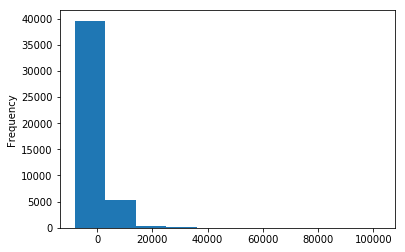

In [37]:
df = pd.read_csv(r"C:\Users\0mer\CS\Year3\Sem_B\Introduction to Data Science\HW\HW1\bank-full_2016.csv")
import matplotlib.pyplot as plt
display(df['balance'].plot.hist())
plt.show()

In [18]:
# Dimensions
print("The dimensions of df are: %s\n" %(df.shape,))

# Attributes
print("The attributes in df are: ")
print([attr for attr in  df.columns])
print("\n")

# outcome groupby
print("Outcome frequencies are: ")
print(df.groupby(df.outcome).size())
print("\n")

# first five rows of the table
print("The first five rows of the table: ")
print(df.head(5))


The dimensions of df are: (45211, 17)

The attributes in df are: 
['age', 'job', 'marital', 'education', 'default_credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days_from_last_contact', 'previous_campaign_contacts', 'previous_campaign_outcome', 'outcome']


Outcome frequencies are: 
outcome
no     39922
yes     5289
dtype: int64


The first five rows of the table: 
   age           job  marital  education default_credit  balance housing_loan  \
0   58    management  married   tertiary             no     2143          yes   
1   44    technician   single  secondary             no       29          yes   
2   33  entrepreneur  married  secondary             no        2          yes   
3   47   blue-collar  married    unknown             no     1506          yes   
4   33       unknown   single    unknown             no        1           no   

  personal_loan  contact  day month  duration  campaign  \
0            no  unknown    

In [19]:
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

In [24]:
df['isContactKnown'] = np.where(df['contact'] == 'unknown', False, True)

In [25]:
new_df = df.loc[df['isContactKnown'] != False]

In [29]:
# Q3
df['age'].corr(df['balance'])

0.0977827393713475

In [32]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()

,age,balance,day,duration,campaign,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.024407,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,0.050534,-0.032855
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.032855,-0.021885,1.000000
